<a href="https://colab.research.google.com/github/Aakash-ML/TransferLearning101/blob/master/Medium_TransferLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Try to demostrate transfer Learning.


##Loading Data

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
# check to make sure your dat ais at the correct location
!ls /content/gdrive/'My Drive'/'Colab Notebooks'/MalariaDatasetMulti.zip

'/content/gdrive/My Drive/Colab Notebooks/MalariaDatasetMulti.zip'


In [3]:
!unzip "/content/gdrive/My Drive/Colab Notebooks/MalariaDatasetMulti.zip"

Archive:  /content/gdrive/My Drive/Colab Notebooks/MalariaDatasetMulti.zip
  inflating: MalariaDatasetMulti.h5  


In [4]:
## to activate TF.2.0
%tensorflow_version 2.x
import tensorflow as tf
print(tf.__version__)
#tf.random.set_seed(12345)
## impots
from sklearn.metrics import classification_report
import IPython.display as display
from PIL import Image
import numpy as np
import h5py
import matplotlib.pyplot as plt
import os

# plot the training loss and accuracy
# takes history as input
def plot_graph(H):
  list_loss = H.history["val_loss"]
  min_val = min(list_loss)
  min_index = list_loss.index(min_val)
  t_acc = H.history["accuracy"][min_index]
  v_acc = H.history["val_accuracy"][min_index]
  print(f"The model {H.model.name} has the lowest val_loss {min_val} at epoch {min_index+1} with \ntrain accuracy of {t_acc} and validation accuracy {v_acc}." )
  plt.style.use("ggplot")
  plt.figure()
  plt.plot(np.arange(0, 60), H.history["loss"], label="train_loss")
  plt.plot(np.arange(0, 60), H.history["val_loss"], label="val_loss")
  plt.plot(np.arange(0, 60), H.history["accuracy"], label="train_acc")
  plt.plot(np.arange(0, 60), H.history["val_accuracy"], label="val_acc")
  plt.title("Training Loss and Accuracy")
  plt.xlabel("Epoch #")
  plt.ylabel("Loss/Accuracy")
  plt.legend()
  plt.savefig(f"{H.model.name}_{v_acc}.png")

def loadDataH5():
    with h5py.File('MalariaDatasetMulti.h5','r') as hf:
        trainX = np.array(hf.get('trainX'))
        trainY = np.array(hf.get('trainY'))
        valX = np.array(hf.get('testX'))
        valY = np.array(hf.get('testY'))
        print (trainX.shape,trainY.shape)
        print (valX.shape,valY.shape)
    return trainX, trainY, valX, valY

trainX, trainY, testX, testY = loadDataH5()

2.2.0
(26180, 100, 100, 3) (26180, 2)
(1378, 100, 100, 3) (1378, 2)


In [5]:
CLASS_NAMES = np.array(["Parasitized","Uninfected"])
print(CLASS_NAMES)

['Parasitized' 'Uninfected']


In [6]:
%cd /content/gdrive/My\ Drive/cit/Malaria

/content/gdrive/My Drive/cit/Malaria


View the images 

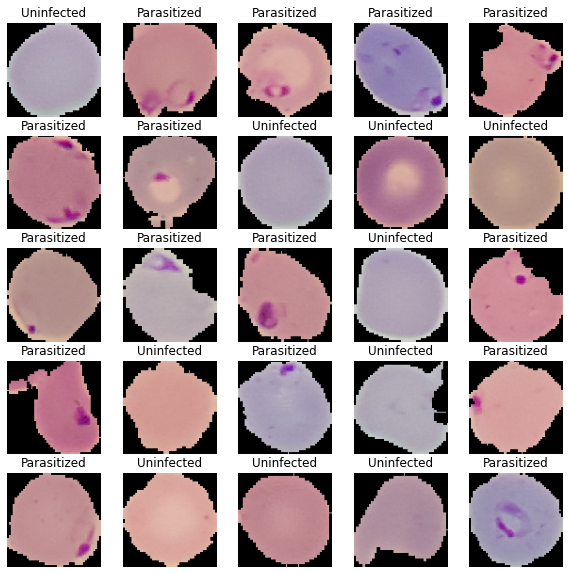

In [7]:
from PIL import Image
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
import random
randomlist = random.sample(range(0, 1378), 25)
def show_batch(Selected):
  plt.figure(figsize=(10,10))
  CLASS_NAMES
  i = 1
  for n in Selected:
      ax = plt.subplot(5,5,i)
      plt.imshow(Image.fromarray(np.uint8(testX[n]*255)))
      plt.title(f"{CLASS_NAMES[testY[n]][0]}")
      plt.axis('off')
      i+=1

show_batch(randomlist)

In [8]:
from keras.preprocessing.image import ImageDataGenerator
image_gen = ImageDataGenerator(rotation_range=30, # rotate the image 30 degrees
                               width_shift_range=0.1, # Shift the pic width by a max of 10%
                               height_shift_range=0.1, # Shift the pic height by a max of 10%
                               #rescale=1./255, # Rescale the image by normalzing it.
                               shear_range=0.2, # Shear means cutting away part of the image (max 20%)
                               zoom_range=0.2, # Zoom in by 20% max
                               horizontal_flip=True, # Allo horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )

Using TensorFlow backend.


In [9]:
# global variables
# width,height,channels
Image_Shape = (100,100,3)
Batch_Size = 32
NUM_EPOCHS = 60

In [10]:
def runmodel(model):
  # defining common params.
  tmpdir = f"./{model.name}"
  os.makedirs(tmpdir, exist_ok=True)
  fname = "checkpoint.hdf5"
  f = os.path.join(tmpdir, fname)
  checkpoint = tf.keras.callbacks.ModelCheckpoint(f, monitor="val_loss", mode="min", save_best_only=True, verbose=1)
  #compiling model
  #bce = tf.keras.losses.BinaryCrossentropy()
  opt= tf.keras.optimizers.Adam(lr=0.0001)
  model.compile(loss='categorical_crossentropy', optimizer=opt,
  metrics=["accuracy"])
  print(model.summary())
  ##
  datagen2 = tf.keras.preprocessing.image.ImageDataGenerator(rotation_range=40,
          width_shift_range=0.2,
          height_shift_range=0.2,
          #rescale=1./255,
          shear_range=0.2,
          zoom_range=0.2,
          horizontal_flip=True,
          fill_mode='nearest')
  # train the network
  print("Training network...")
  H = model.fit(image_gen.flow(trainX, trainY, batch_size=32), validation_data=(testX, testY),batch_size=32,steps_per_epoch=len(trainX) / 32,callbacks=[checkpoint], epochs=NUM_EPOCHS)
  plot_graph(H)

##Loading model and adding the top.

In [20]:
# adding the Resnet50v2 model
Resnet = tf.keras.applications.ResNet50V2(include_top=False,weights='imagenet',input_shape=(100,100,3))
Resnet.trainable = False
#print(Resnet.summary())
myResnet = tf.keras.models.Sequential(name='MyResnet')
myResnet.add(Resnet)
myResnet.add(tf.keras.layers.Flatten())
myResnet.add(tf.keras.layers.Dropout(0.5))
myResnet.add(tf.keras.layers.Dense(256, activation='relu'))
myResnet.add(tf.keras.layers.Dropout(0.5))
myResnet.add(tf.keras.layers.Dense(64, activation='relu'))
myResnet.add(tf.keras.layers.Dense(2, activation='softmax'))
print(myResnet.summary())

Model: "MyResnet"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50v2 (Model)           (None, 4, 4, 2048)        23564800  
_________________________________________________________________
flatten_2 (Flatten)          (None, 32768)             0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 32768)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               8388864   
_________________________________________________________________
dropout_5 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 64)                16448     
_________________________________________________________________
dense_8 (Dense)              (None, 2)                 130

Model: "MyResnet"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50v2 (Model)           (None, 4, 4, 2048)        23564800  
_________________________________________________________________
flatten_2 (Flatten)          (None, 32768)             0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 32768)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               8388864   
_________________________________________________________________
dropout_5 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 64)                16448     
_________________________________________________________________
dense_8 (Dense)              (None, 2)                 130

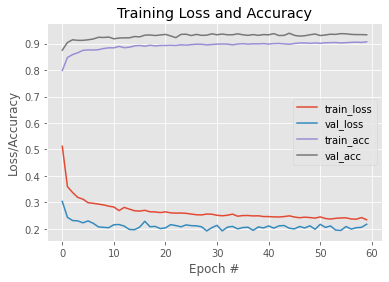

In [21]:
#traing the model
runmodel(myResnet)

##Valuation Of model

In [22]:
#@title Below are the valution values
from sklearn.metrics import classification_report,confusion_matrix, roc_curve, auc, accuracy_score,mean_squared_error,mean_squared_log_error
#Evaluate the model by loading the best weights
modelMulti = tf.keras.models.load_model('./MyResnet/checkpoint.hdf5') 

#evaluate accuracy
y_pred = modelMulti.predict(testX)
incepres_accuracy = accuracy_score(testY.argmax(axis=-1),y_pred.argmax(axis=-1))
print('The accuracy of the MyResnet Custom model is: ', incepres_accuracy)

#evaluate mean squared error
incepres_custom_mse = mean_squared_error(testY.argmax(axis=-1),y_pred.argmax(axis=-1))
print('The Mean Squared Error of the MyResnet Custom model is: ', incepres_custom_mse)

#evaluate mean squared log error
incepres_custom_msle = mean_squared_log_error(testY.argmax(axis=-1),y_pred.argmax(axis=-1))  
print('The Mean Squared Log Error of the MyResnet Custom model is: ', incepres_custom_msle)

The accuracy of the MyResnet Custom model is:  0.9361393323657474
The Mean Squared Error of the MyResnet Custom model is:  0.06386066763425254
The Mean Squared Log Error of the MyResnet Custom model is:  0.03068205023570517


              precision    recall  f1-score   support

 Parasitized     0.9532    0.9173    0.9349       689
  Uninfected     0.9203    0.9550    0.9373       689

    accuracy                         0.9361      1378
   macro avg     0.9368    0.9361    0.9361      1378
weighted avg     0.9368    0.9361    0.9361      1378



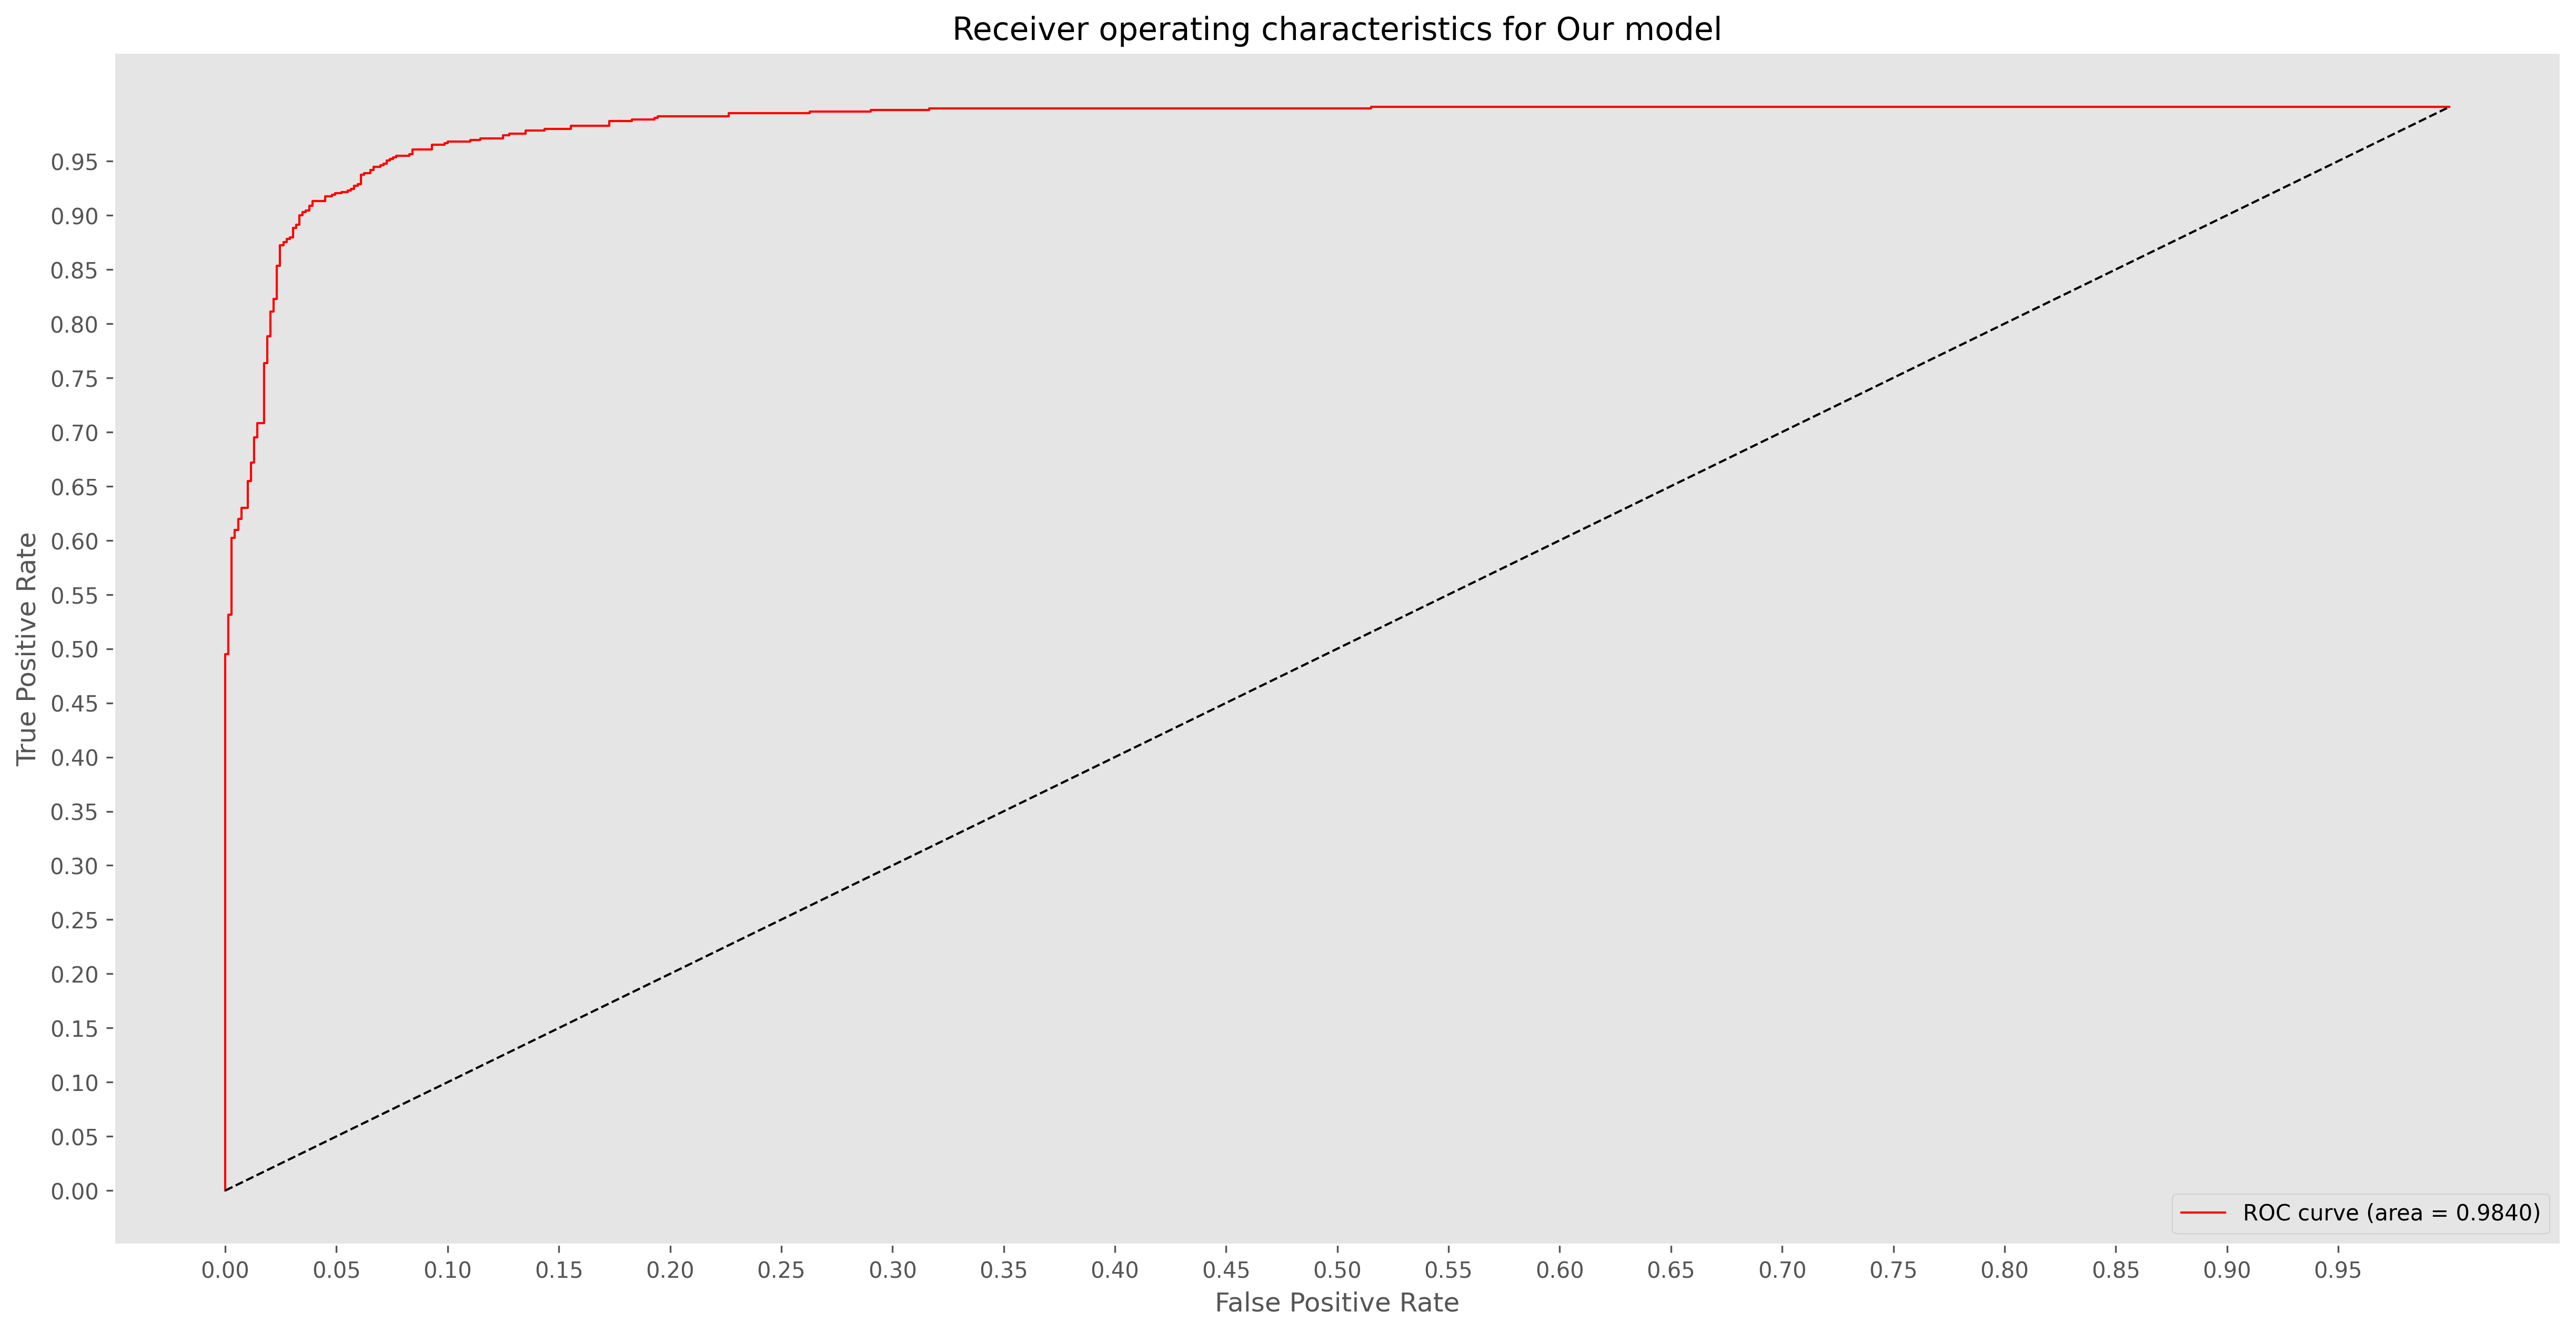

In [24]:
#@title Below is the Confusion matrix and Roc Curve for the model
import itertools
#%% print classification report and plot confusion matrix
target_names = CLASS_NAMES
print(classification_report(testY.argmax(axis=-1),y_pred.argmax(axis=-1),
                            target_names=target_names, digits=4))

# Compute confusion matrix
cnf_matrix = confusion_matrix(testY.argmax(axis=-1),y_pred.argmax(axis=-1))
np.set_printoptions(precision=4)

# # Plot non-normalized confusion matrix
# plt.figure(figsize=(20,10), dpi=300)
# plot_confusion_matrix(cnf_matrix, classes=target_names)
# plt.show()

#%% compute the ROC-AUC values
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(testY.argmax(axis=-1), y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
fig=plt.figure(figsize=(20,10), dpi=300)
ax = fig.add_subplot(1, 1, 1)
major_ticks = np.arange(0.0, 1.0, 0.05)
minor_ticks = np.arange(0.0, 1.0, 0.05)
ax.set_xticks(major_ticks)
ax.set_xticks(minor_ticks, minor=True)
ax.set_yticks(major_ticks)
ax.set_yticks(minor_ticks, minor=True)
ax.grid(which='both')
lw = 1 
plt.plot(fpr[1], tpr[1], color='red',
         lw=lw, label='ROC curve (area = %0.4f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], color='black', lw=lw, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristics for Our model')
plt.legend(loc="lower right")
plt.show()

NameError: ignored

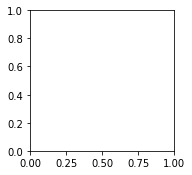

In [2]:
#@title Figure with random 25 samples from test set with there output.
from PIL import Image
import numpy as np
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
import random
randomlist = random.sample(range(0, 1378), 25)
def show_batch(Selected):
  plt.figure(figsize=(15,15))
  classname = ["Uninfected","Infected"]
  i = 1
  for n in Selected:
      ax = plt.subplot(5,5,i)
      plt.imshow(Image.fromarray(np.uint8(testX[n]*255)))
      plt.title(f"{CLASS_NAMES[testY[n].argmax()]},\no/p = {CLASS_NAMES[y_pred[n].argmax()]}")
      plt.axis('off')
      i+=1

show_batch(randomlist)

##Fine Tunning Resnet 
As the performance of Resnet was better we would like to investigate futher, Thus we try to fine tune the last conv layer and also the last dense connected to layer to gernelize to our dataset.


 Phase B  - Fine Tune Fully Connected Layer and Selected Convolutional Layers 

Model: "MyResnetMulti"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50v2 (Model)           (None, 4, 4, 2048)        23564800  
_________________________________________________________________
flatten_2 (Flatten)          (None, 32768)             0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 32768)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               8388864   
_________________________________________________________________
dropout_5 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 64)                16448     
______________________________________

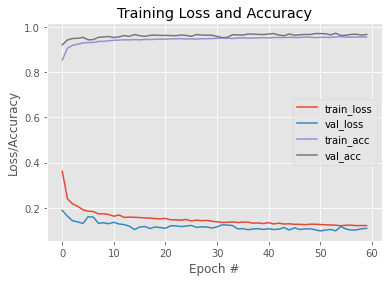

In [ ]:

print ("\n Phase B  - Fine Tune Fully Connected Layer and Selected Convolutional Layers \n")
Resnet.trainable = True
trainableFlag = False
for layer in Resnet.layers:
  if layer.name == 'conv5_block3_1_conv':
    trainableFlag = True
  layer.trainable = trainableFlag
runmodel(myResnetB)

At the end of 60 epochs we get the accuraccy of 0.9709 ~ 97% on validation set, Thus as there is still scope to train more, we would like to run the model for more epochs till, it shows over fitting sign on traning data.

In [ ]:
# try to predict using loading the model
model1 = tf.keras.models.load_model('./MyResnetMulti/checkpoint.hdf5')
runmodel(model1)

Model: "MyResnetMulti"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50v2 (Model)           (None, 4, 4, 2048)        23564800  
_________________________________________________________________
flatten_2 (Flatten)          (None, 32768)             0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 32768)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               8388864   
_________________________________________________________________
dropout_5 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 64)                16448     
_________________________________________________________________
dense_8 (Dense)              (None, 2)               

KeyboardInterrupt: ignored

## Valuating model
Now we would load the model and then valuate the confution matrix to gain insight into the performance.

In [ ]:
CLASS_NAMES

array(['Parasitized', 'Uninfected'], dtype='<U11')

##Valuation of Model

In [ ]:
#@title Below are the valution values
from sklearn.metrics import classification_report,confusion_matrix, roc_curve, auc, accuracy_score,mean_squared_error,mean_squared_log_error
#Evaluate the model by loading the best weights
modelMulti = tf.keras.models.load_model('./MyResnetMulti/checkpoint.hdf5') 
#inceptionresnet_custom_model.load_weights('weights/InceptionResnet_custom.15-0.9956.h5')

#evaluate accuracy
y_pred = modelMulti.predict(testX)
incepres_accuracy = accuracy_score(testY.argmax(axis=-1),y_pred.argmax(axis=-1))
print('The accuracy of the InceptionResNetV2 Custom model is: ', incepres_accuracy)

#evaluate mean squared error
incepres_custom_mse = mean_squared_error(testY.argmax(axis=-1),y_pred.argmax(axis=-1))
print('The Mean Squared Error of the InceptionResNetv2 Custom model is: ', incepres_custom_mse)

#evaluate mean squared log error
incepres_custom_msle = mean_squared_log_error(testY.argmax(axis=-1),y_pred.argmax(axis=-1))  
print('The Mean Squared Log Error of the InceptionResNetv2 Custom model is: ', incepres_custom_msle)

The accuracy of the InceptionResNetV2 Custom model is:  0.9716981132075472
The Mean Squared Error of the InceptionResNetv2 Custom model is:  0.02830188679245283
The Mean Squared Log Error of the InceptionResNetv2 Custom model is:  0.013597726809005698


In [ ]:
print(y_pred.argmax(axis=-1)[:10])
print(testY.argmax(axis=-1)[:10])

[0 0 0 0 1 1 0 0 1 0]
[0 0 0 0 1 1 0 0 1 0]


In [ ]:
#@title
def plot_confusion_matrix(cm, classes,
                          normalize=False, #if true all values in confusion matrix is between 0 and 1
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

 Parasitized     0.9808    0.9623    0.9714       689
  Uninfected     0.9630    0.9811    0.9720       689

    accuracy                         0.9717      1378
   macro avg     0.9719    0.9717    0.9717      1378
weighted avg     0.9719    0.9717    0.9717      1378

Confusion matrix, without normalization
[[663  26]
 [ 13 676]]


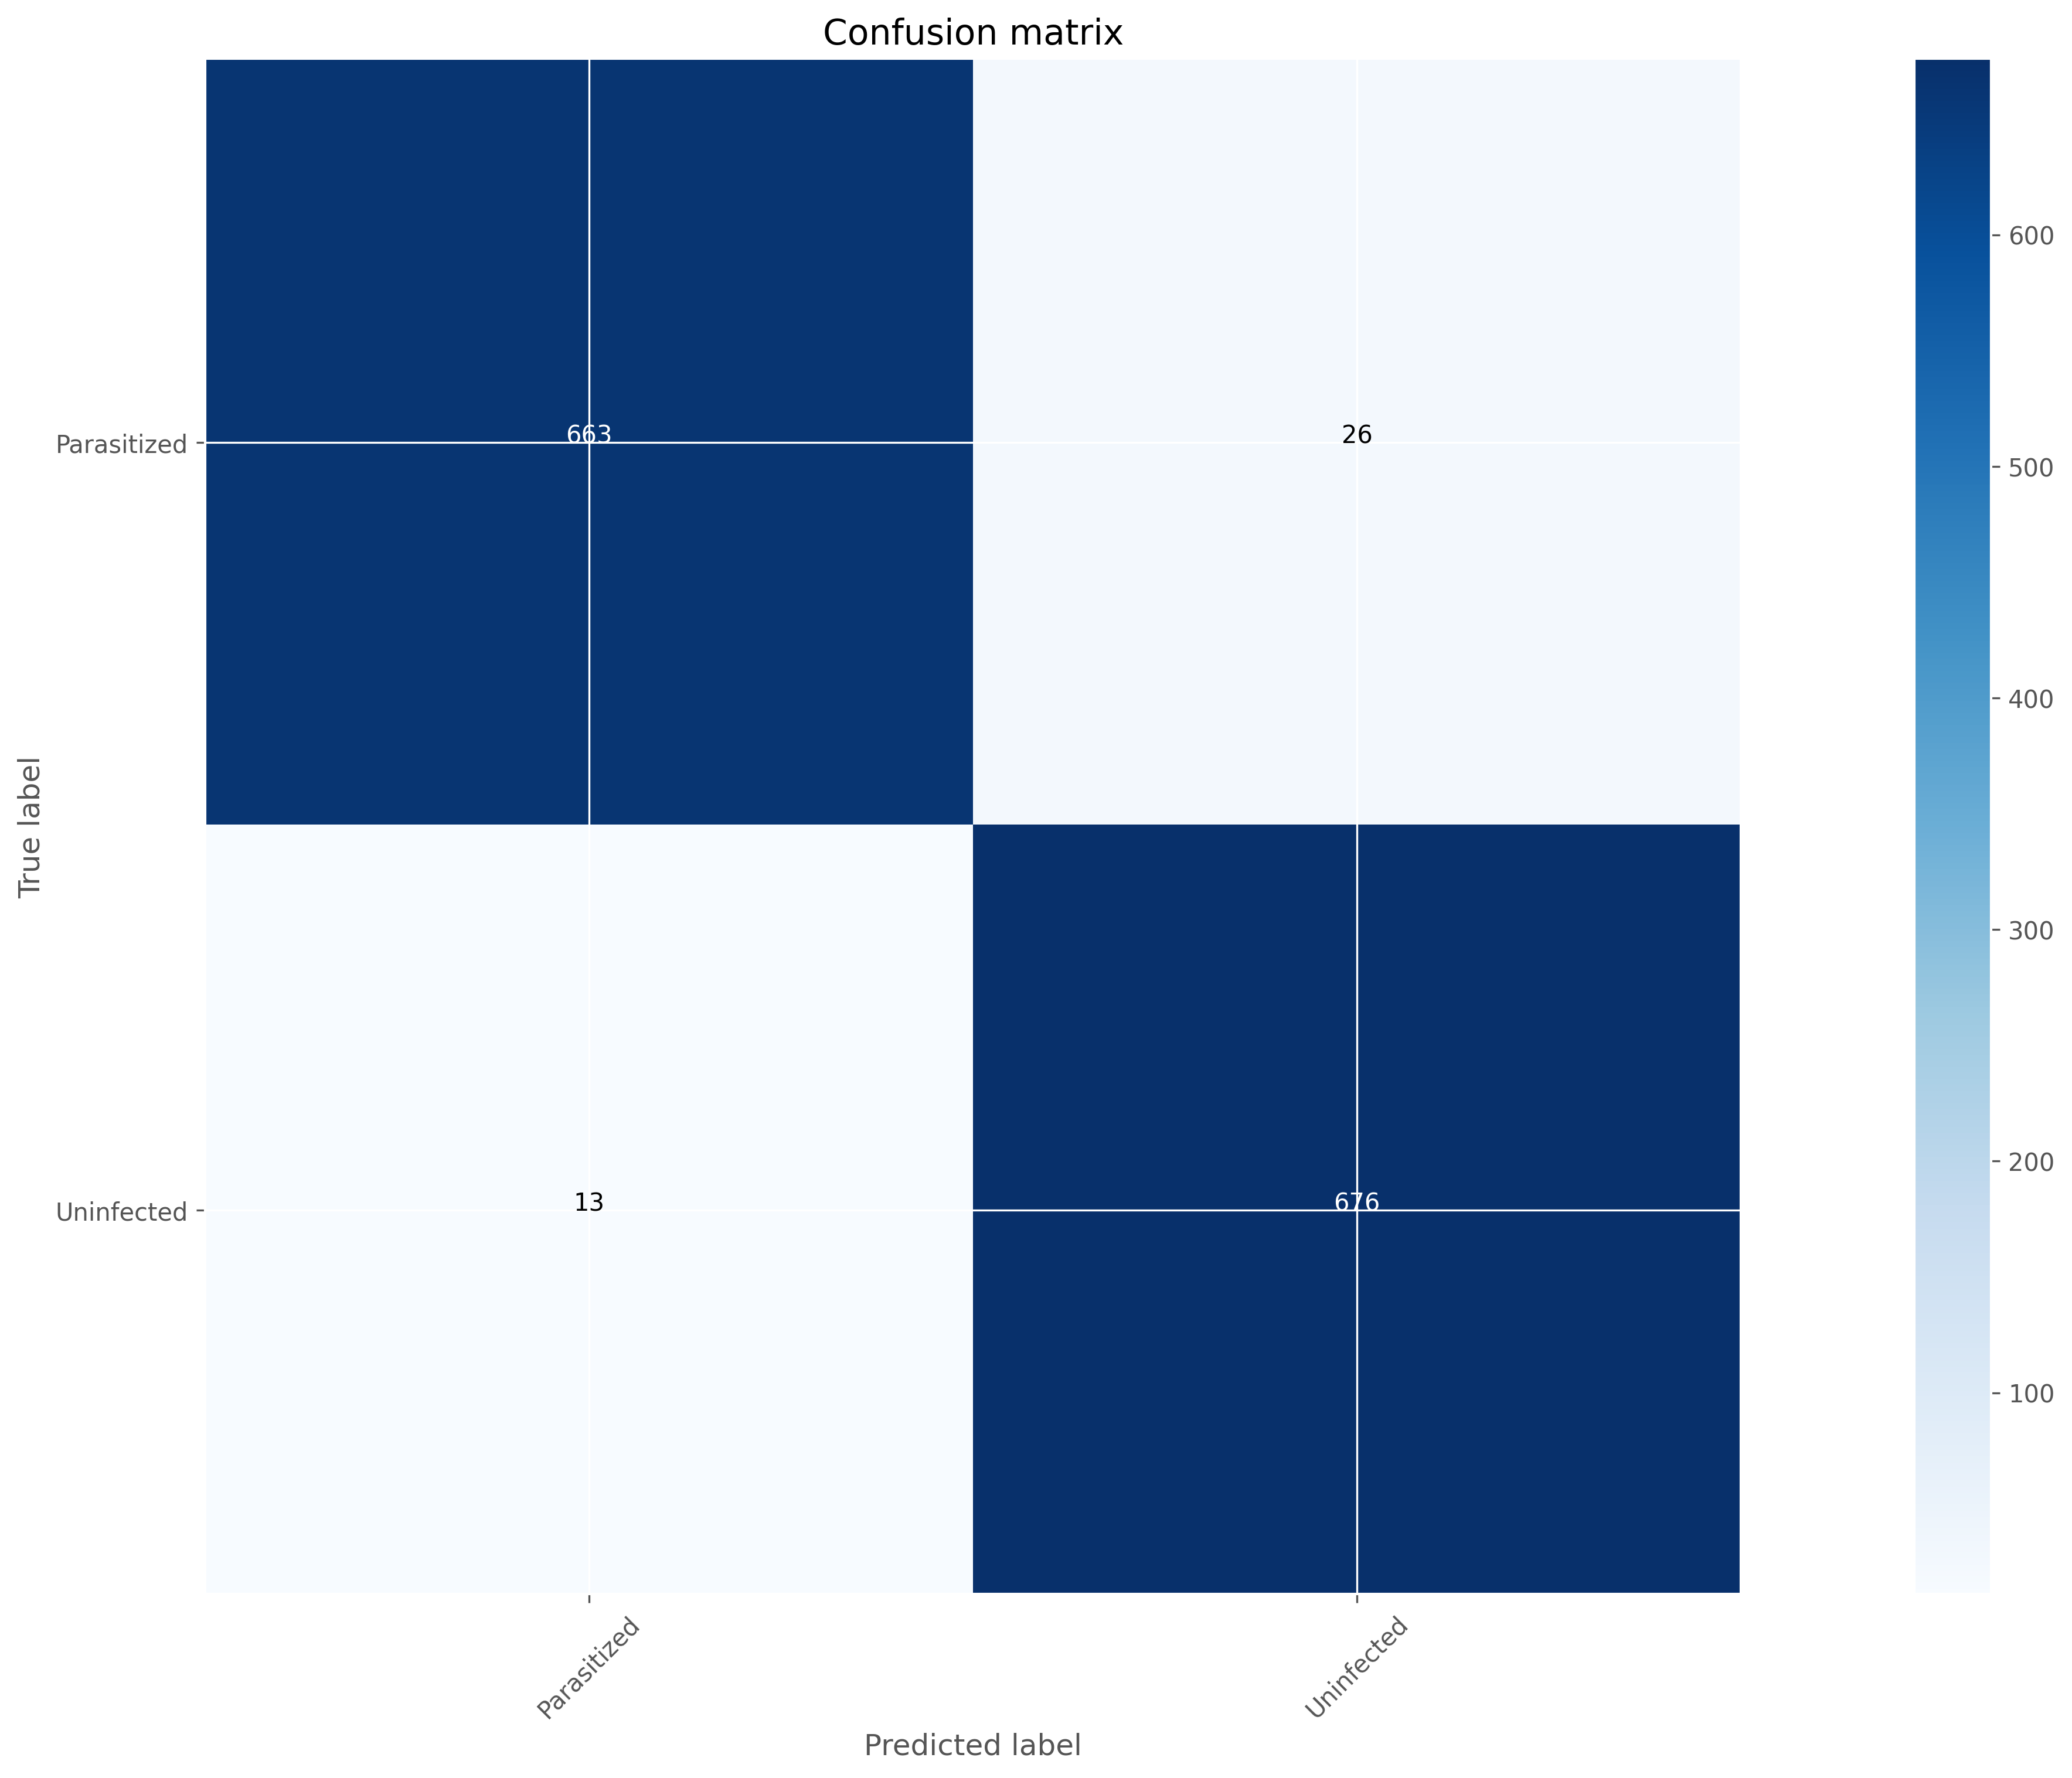

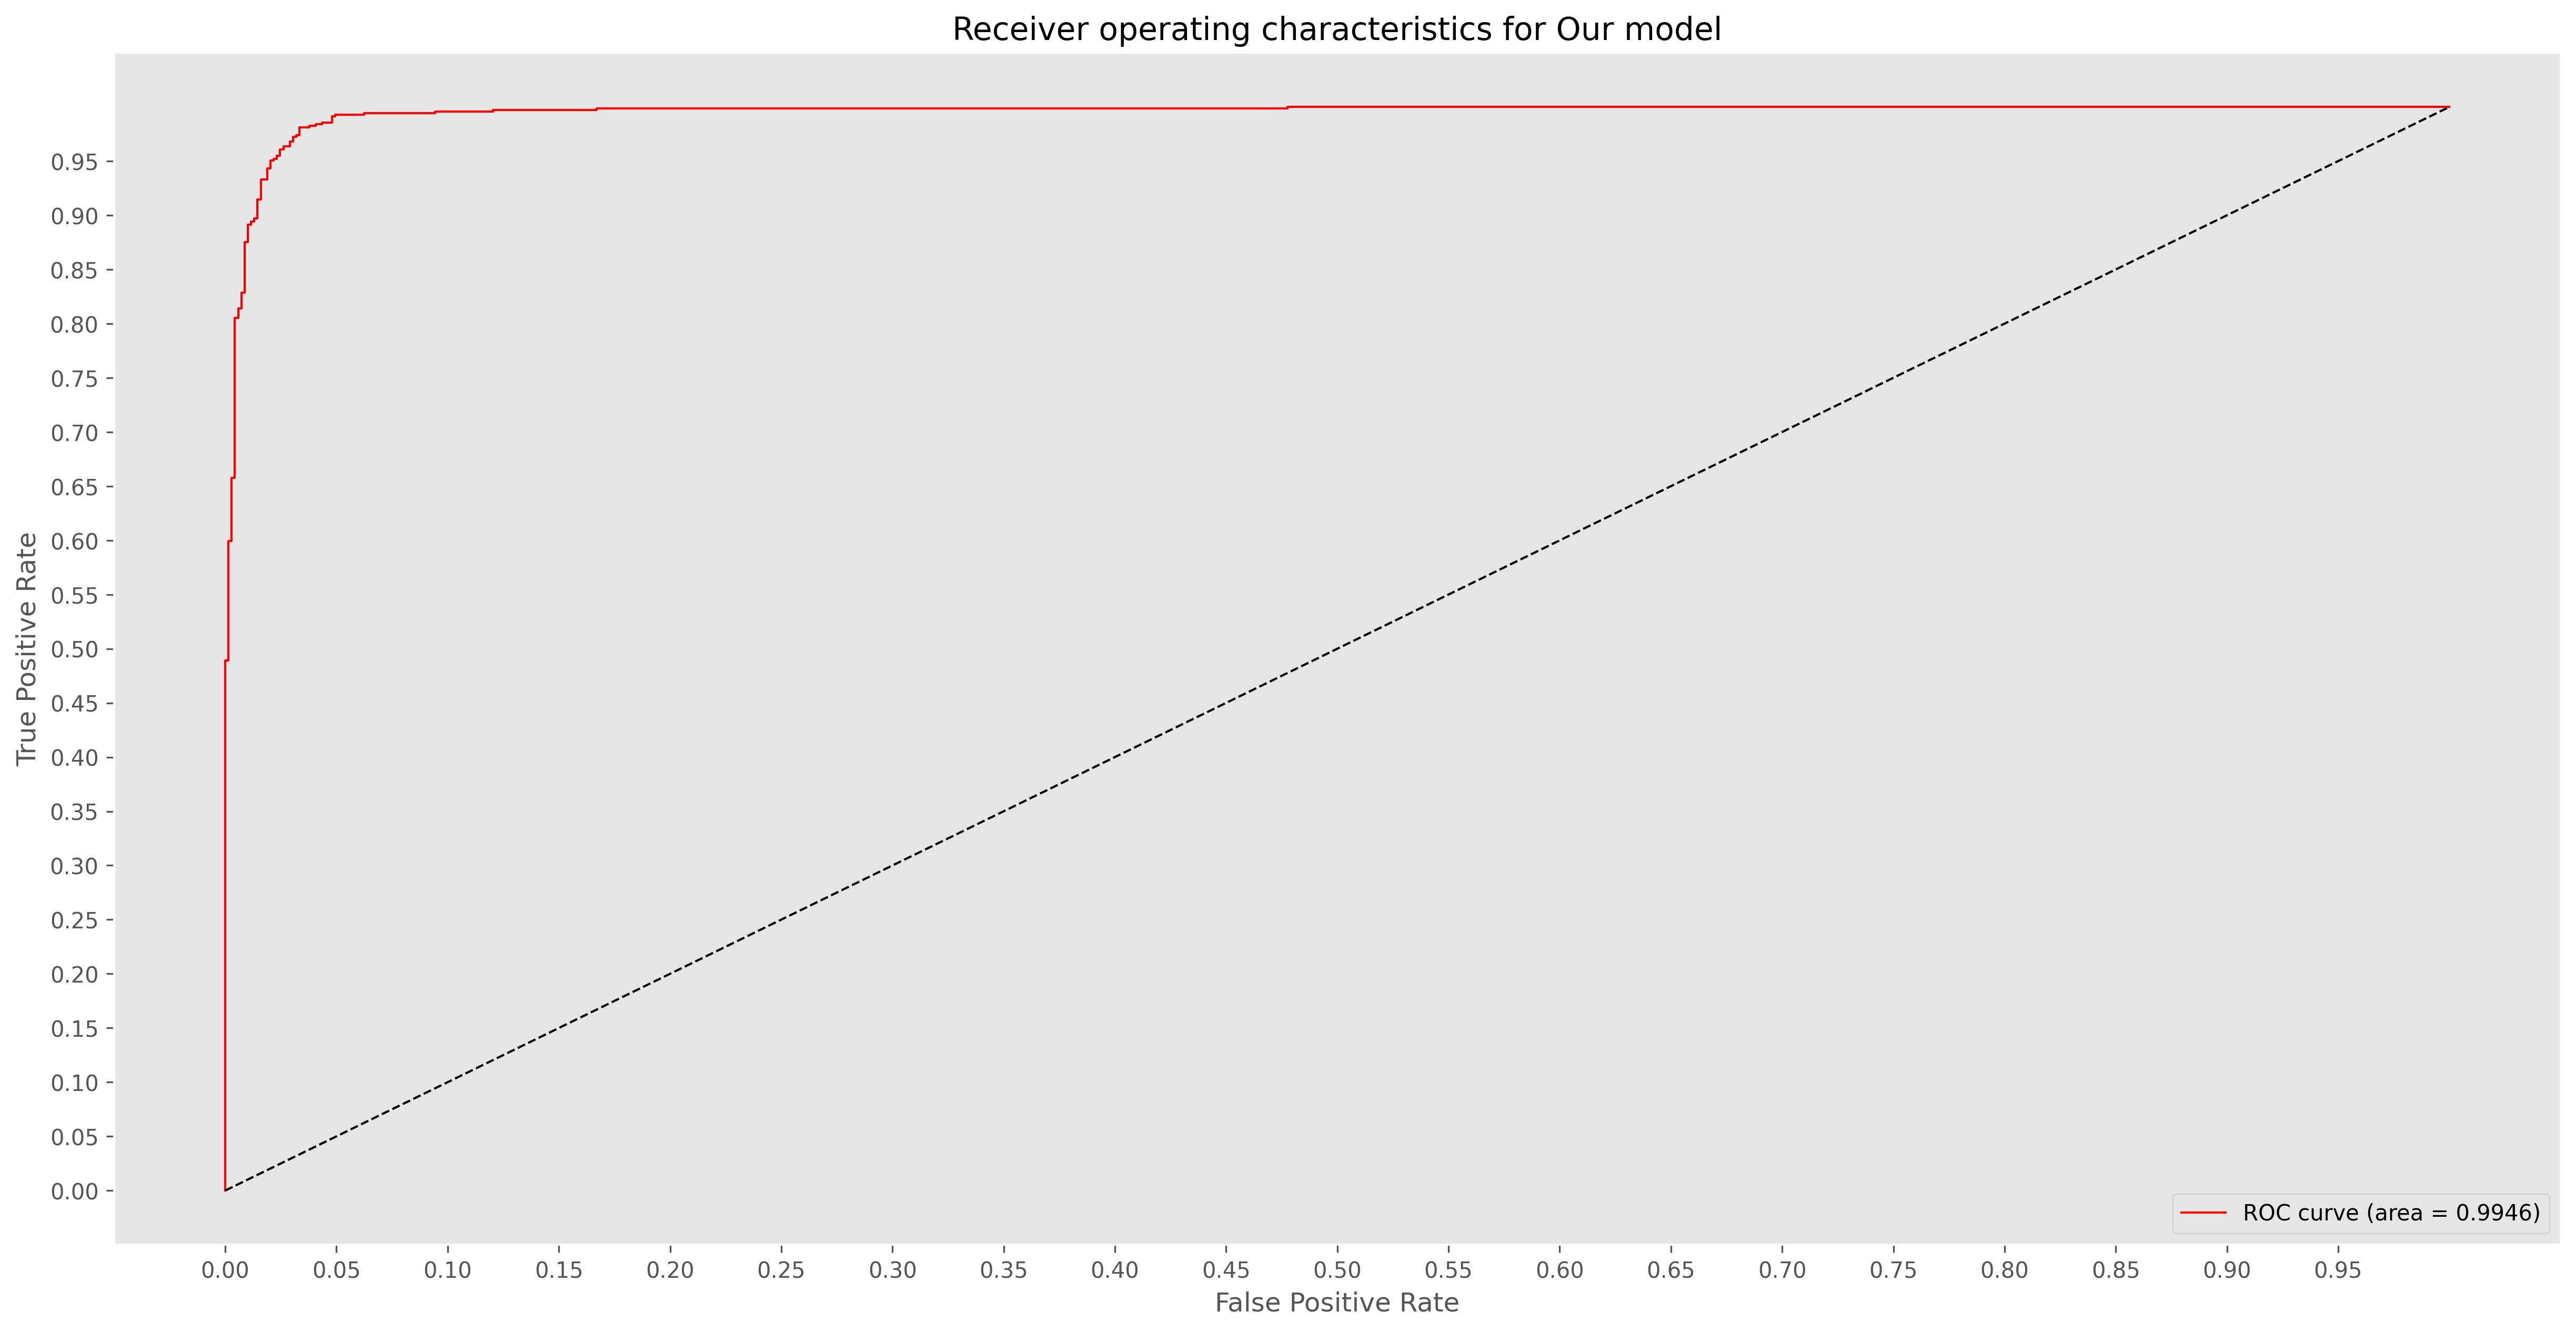

In [ ]:
#@title
import itertools
#%% print classification report and plot confusion matrix
target_names = CLASS_NAMES
print(classification_report(testY.argmax(axis=-1),y_pred.argmax(axis=-1),
                            target_names=target_names, digits=4))

# Compute confusion matrix
cnf_matrix = confusion_matrix(testY.argmax(axis=-1),y_pred.argmax(axis=-1))
np.set_printoptions(precision=4)

# Plot non-normalized confusion matrix
plt.figure(figsize=(20,10), dpi=300)
plot_confusion_matrix(cnf_matrix, classes=target_names)
plt.show()

#%% compute the ROC-AUC values
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(testY.argmax(axis=-1), y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
fig=plt.figure(figsize=(20,10), dpi=300)
ax = fig.add_subplot(1, 1, 1)
major_ticks = np.arange(0.0, 1.0, 0.05)
minor_ticks = np.arange(0.0, 1.0, 0.05)
ax.set_xticks(major_ticks)
ax.set_xticks(minor_ticks, minor=True)
ax.set_yticks(major_ticks)
ax.set_yticks(minor_ticks, minor=True)
ax.grid(which='both')
lw = 1 
plt.plot(fpr[1], tpr[1], color='red',
         lw=lw, label='ROC curve (area = %0.4f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], color='black', lw=lw, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristics for Our model')
plt.legend(loc="lower right")
plt.show()

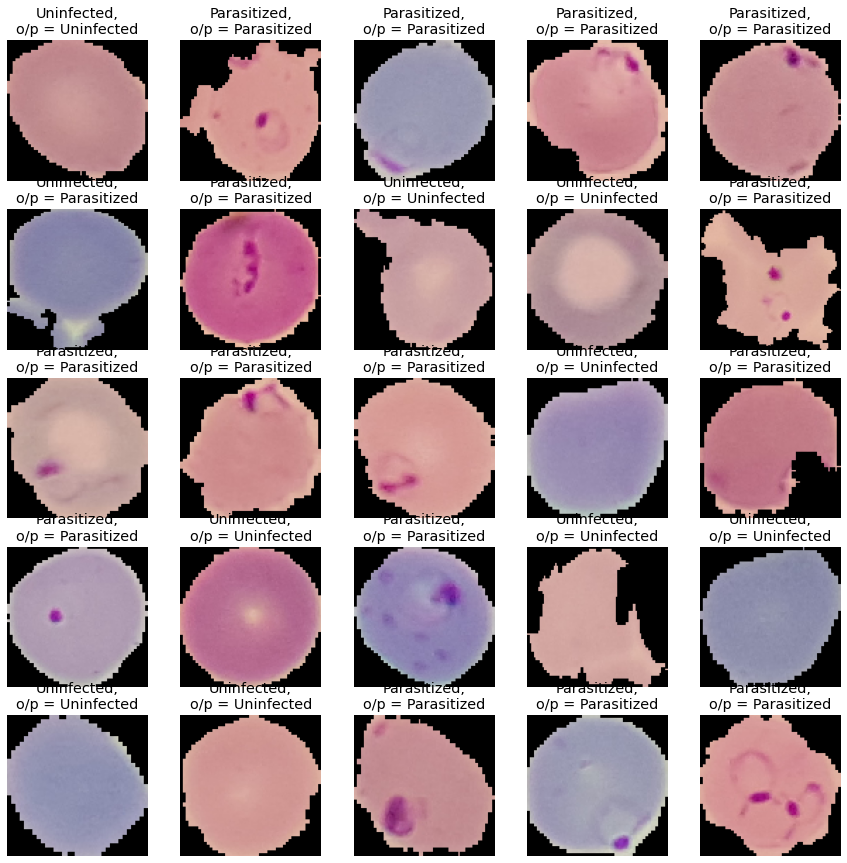

In [ ]:
#@title Figure with random 25 samples from test set with there output.
from PIL import Image
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
import random
randomlist = random.sample(range(0, 1378), 25)
def show_batch(Selected):
  plt.figure(figsize=(15,15))
  classname = ["Uninfected","Infected"]
  i = 1
  for n in Selected:
      ax = plt.subplot(5,5,i)
      plt.imshow(Image.fromarray(np.uint8(testX[n]*255)))
      plt.title(f"{CLASS_NAMES[testY[n].argmax()]},\no/p = {CLASS_NAMES[y_pred[n].argmax()]}")
      plt.axis('off')
      i+=1

show_batch(randomlist)

# Some doubts.
##1 Why we need high accuracy on this dataset, will not overfit the model on this data instead of actual images that our device will capture.
##2 Are we very much sure that device will capture the images similar type i.e in the data set provided.
##3 How are we planning on getting each cell image form a large test slide.

would love discuss with you the futher steps.